In [1]:
import glob
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
def generate_ypred(score_list):
    '''''
    labels :

    anger -->0
    happy -->1
    excited -->1
    neutral -->2
    sad --> 3 

    we club happy and excited as happy
    '''''

    tru_label =[]
    pred_label =[]
    for item in score_list:
        ground_truth = int(item.split(' ')[1])
        start = '['  
        end = ']'
        strin = item
        req_string = strin[strin.find(start)+len(start): strin.rfind(end)]
        req_str_list = req_string.split(' ')
        distribution = []
        for element in req_str_list:
            try:
                distribution.append(float(element))
            except:
                continue
        #print(ground_truth, distribution)
        tru_label.append(ground_truth)
        pred_label.append(np.argmax(distribution))
    return tru_label , pred_label

In [3]:
t_lab_lst=[]
p_lab_lst=[]
id_lst = ['f1', 'f2', 'f3', 'f4', 'f5']
for exp_id in id_lst: 
    #exp_id ='f5'  #f1,f2,f3,f4,f5
    session_id = {'f1':'Session5', 'f2':'Session4','f3':'Session3','f4':'Session2','f5':'Session1'}
    print(session_id[exp_id])
    #"/idiap/temp/tpurohit/IEMOCAP-SD/exp/exp_f1/cnn_subseg_1/scores.txt"
    path_score = "/idiap/temp/tpurohit/IEMOCAP-SD/exp/exp_"+exp_id+"/cnn_subseg_1/scores.txt"
    title = "IEMOCAP: SubSeg"
    f = open(path_score,"r")
    score= f.read()
    score_list = score.split("\n")
    del score_list[-1]
    print(len(score_list))
    tru_lab, pre_lab = generate_ypred(score_list)
    t_lab_lst.append(tru_lab)
    p_lab_lst.append(pre_lab)

Session5
1107
Session4
1106
Session3
1106
Session2
1106
Session1
1106


In [4]:
tru_lab = t_lab_lst[0]+t_lab_lst[1]+t_lab_lst[2]+t_lab_lst[3]+t_lab_lst[4]
pre_lab = p_lab_lst[0]+p_lab_lst[1]+p_lab_lst[2]+p_lab_lst[3]+p_lab_lst[4]
print(len(tru_lab),len(pre_lab))

5531 5531


In [5]:
from sklearn.metrics import classification_report
target_names = ['anger', 'happy', 'neutral', 'sad']

print(classification_report(tru_lab, pre_lab, target_names=target_names,digits=4))

              precision    recall  f1-score   support

       anger     0.8074    0.6156    0.6986      1103
       happy     0.6171    0.6925    0.6526      1636
     neutral     0.6844    0.5726    0.6235      1708
         sad     0.5986    0.7869    0.6800      1084

    accuracy                         0.6587      5531
   macro avg     0.6769    0.6669    0.6637      5531
weighted avg     0.6722    0.6587    0.6582      5531



In [6]:
from sklearn.metrics import confusion_matrix
conf_mat_data= confusion_matrix(tru_lab, pre_lab)
conf_mat_data

array([[ 679,  250,  109,   65],
       [ 110, 1133,  216,  177],
       [  43,  357,  978,  330],
       [   9,   96,  126,  853]])

In [13]:
conf_mat_data_normalize= (confusion_matrix(tru_lab, pre_lab, normalize='true')*100)
conf_mat_data_normalize

array([[61.5593835 , 22.66545784,  9.88213962,  5.89301904],
       [ 6.72371638, 69.25427873, 13.20293399, 10.8190709 ],
       [ 2.5175644 , 20.90163934, 57.25995316, 19.32084309],
       [ 0.8302583 ,  8.85608856, 11.62361624, 78.6900369 ]])

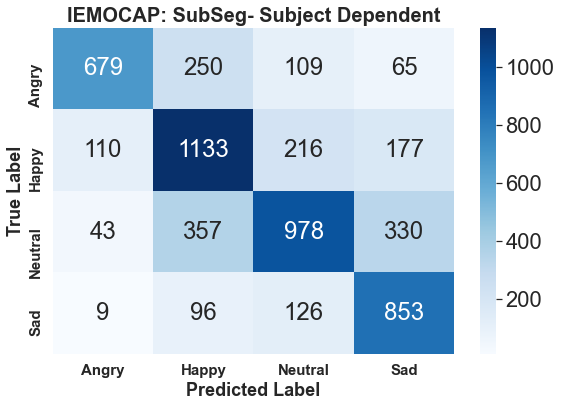

In [9]:
import seaborn
import matplotlib.pyplot as plt
labels = ['Angry', 'Happy', 'Neutral', 'Sad']
seaborn.set(color_codes=True)
plt.figure(1, figsize=(9,6))
plt.title ("IEMOCAP: SubSeg- Subject Dependent",fontsize='20',weight="bold")
seaborn.set(font_scale=2)
ax=seaborn.heatmap(conf_mat_data, annot=True, cmap='Blues', cbar_kws={'label':''}, fmt='.0f')
ax.set_xticklabels(labels,weight="bold")
ax.set_yticklabels(labels,weight="bold")
#ax.set(ylabel='True Label', xlabel='Predicted Label',fontsize='15')
ax.set_ylabel('True Label',fontsize='18', weight="bold")
ax.set_xlabel('Predicted Label',fontsize='18',weight="bold")
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
plt.savefig("/idiap/temp/tpurohit/IEMOCAP-SD/IEMOCAP_SD.png",bbox_inches='tight', dpi=300)

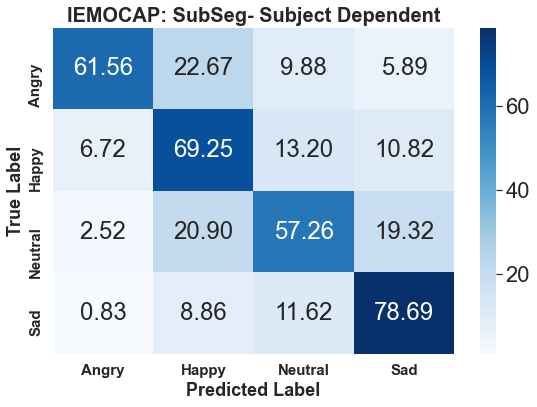

In [15]:
import seaborn
import matplotlib.pyplot as plt
labels = ['Angry', 'Happy', 'Neutral', 'Sad']
seaborn.set(color_codes=True)
plt.figure(1, figsize=(9,6))
plt.title ("IEMOCAP: SubSeg- Subject Dependent",fontsize='20',weight="bold")
seaborn.set(font_scale=2)
ax=seaborn.heatmap(conf_mat_data_normalize, annot=True, cmap='Blues', cbar_kws={'label':''}, fmt='.2f')
ax.set_xticklabels(labels,weight="bold")
ax.set_yticklabels(labels,weight="bold")
#ax.set(ylabel='True Label', xlabel='Predicted Label',fontsize='15')
ax.set_ylabel('True Label',fontsize='18', weight="bold")
ax.set_xlabel('Predicted Label',fontsize='18',weight="bold")
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
plt.savefig("/idiap/temp/tpurohit/IEMOCAP-SD/IEMOCAP_SD_normalized.png",bbox_inches='tight', dpi=300)